In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import warnings

In [294]:
path_cd = os.getcwd() + '/DataSets-main/Cab_Data.csv'
path_c = os.getcwd() + '/DataSets-main/City.csv'
path_c_id = os.getcwd() + '/DataSets-main/Customer_ID.csv'
path_t_id = os.getcwd() + '/DataSets-main/Transaction_ID.csv'

cab_data = pd.read_csv(path_cd)
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],unit = 'D',origin = '1899-12-30')
city = pd.read_csv(path_c)
customer_id = pd.read_csv(path_c_id)
transaction_id = pd.read_csv(path_t_id)

In [295]:
display(cab_data.head())
display(city.head())
display(customer_id.head())
display(transaction_id.head())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [298]:
customer_info = pd.merge(customer_id, transaction_id, on="Customer ID")
customer_info

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [299]:
ride_info = pd.merge(cab_data, customer_info, on="Transaction ID")
meh = []
for i in range(0, len(ride_info)):
    profit = (((ride_info.iloc[i])['Price Charged'] - (ride_info.iloc[i])['Cost of Trip']) / (ride_info.iloc[i])['Cost of Trip'])*100
    meh.append(profit)
perc_profit = [ '%.3f' % elem for elem in meh]

In [481]:
ride_info['% markup (profit)'] = perc_profit
ride_info['% markup (profit)'] = ride_info['% markup (profit)'].astype('float')
display(ride_info)
print('The dataset have any null values:', ride_info.isnull().values.any())
print('The dataset have any duplicate transactions:',ride_info['Transaction ID'].duplicated().any())
print('The dataset have any duplicate rows:',ride_info.duplicated().any())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,% markup (profit)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,18.274
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,7.068
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,28.237
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,7.337
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,17.227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash,9.280
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash,6.460
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash,25.002
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card,28.183


The dataset have any null values: False
The dataset have any duplicate transactions: False
The dataset have any duplicate rows: False


We decided that cad_data, customer_id, and transaction_id should all be appened together since they all contain information about the each cab ride and the customer in the cab. Hence we created a large datafram called ride_info where we merged all three datasets. We decided to not append city dataset since it includes more information about the city rather than the cab ride. We can use this dataset as a reference when analyzing different cities. As we can see, we do not have any null/empty values, or duplicate transaction or duplicate rows.

In [168]:
summary = ride_info.describe()
lst = []
for i in list(ride_info.keys()):
    lst.append(ride_info[i].mode().iat[0])
mode = pd.DataFrame(lst)
variables = list(ride_info.keys())
mode.index = variables
mode.rename(columns= {0: 'Mode'}, inplace=True)
mode = mode.transpose()

stat_summ = pd.concat([mode, summary])

stat_summ.loc[len(stat_summ.index)] = stat_summ.iloc[7] - stat_summ.iloc[5]
stat_summ.rename(index={9: 'IQR'},inplace=True)

stat_summ.loc[len(stat_summ.index)] = ride_info.mad()
stat_summ.rename(index={10: 'MAD'},inplace=True)

stat_summ.loc[len(stat_summ.index)] = ride_info.skew()
stat_summ.rename(index={11: 'Skew'},inplace=True)

stat_summ.loc[len(stat_summ.index)] = ride_info.kurt()
stat_summ.rename(index={12: 'Kurtosis'},inplace=True)

stat_summ

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),% markup (profit)
Mode,43105.000000,33.600000,191.270000,362.880000,23.000000,20884.000000,22.456000
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113,35.336705,15048.822937,47.523116
std,307.467197,12.233526,274.378911,157.993661,12.594234,7969.409482,42.571506
min,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000,-40.934000
25%,42697.000000,12.000000,206.437500,151.200000,25.000000,8424.000000,16.084750
50%,42988.000000,22.440000,386.360000,282.480000,33.000000,14685.000000,35.925500
75%,43232.000000,32.960000,583.660000,413.683200,42.000000,21035.000000,71.268250
max,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000,320.215000
IQR,535.000000,20.960000,377.222500,262.483200,17.000000,12611.000000,55.183500


In [379]:
ride_corr = ride_info

corr = ride_corr.corr()
def colors(val):
    if val < 0:
        color = 'firebrick'
    elif val == 1:
        color = 'dimgray'
    elif 0.5 <= val < 1:
        color = 'mediumblue'
    else:
        color = 'black'
    return 'color: %s' % color

def no_corr(val):
    highlight = 'background-color: dimgray'
    default = ''
    if type(val) in [float, int]:
        if val == 1:
            return highlight
        else:
            return default

ahh = corr.style.applymap(colors)
corr = ahh.applymap(no_corr)
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),% markup (profit)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,-0.109988
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.000417
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.463584
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.018536
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.394105
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.006606
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.008196
% markup (profit),-0.109988,-0.000417,0.463584,0.018536,-0.394105,-0.006606,0.008196,1.000000


<AxesSubplot:xlabel='City'>

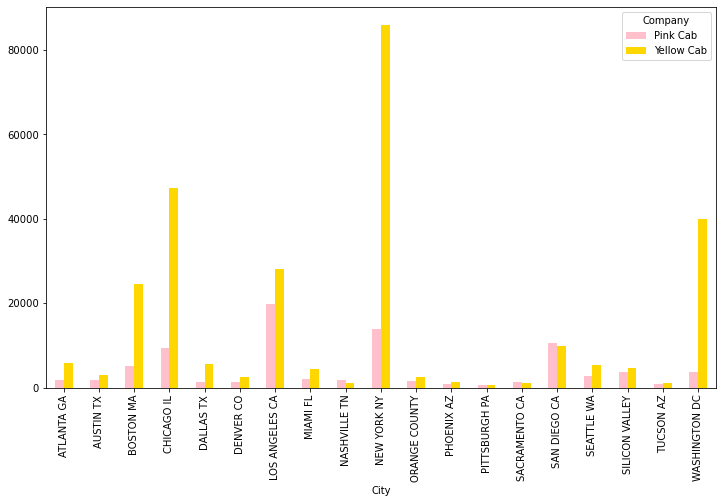

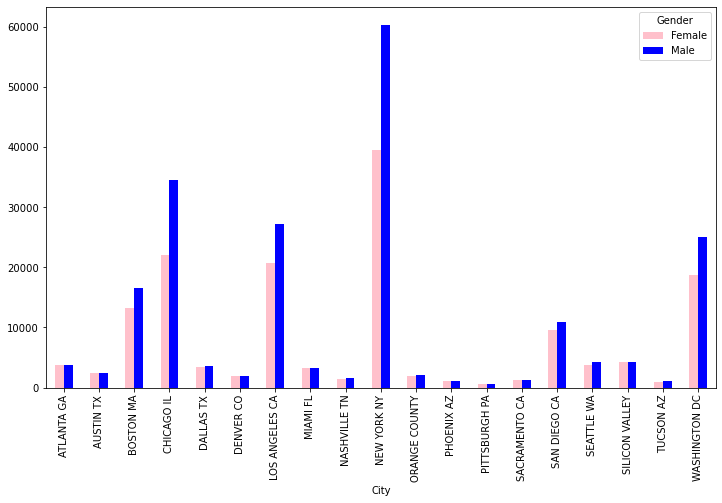

In [424]:
rides = ride_info.reset_index()
rides = ride_info.rename(columns = {'index' : 'Transaction ID'})

cab_color_sum = rides.groupby(by=['City','Company']).count()['Transaction ID'].unstack("Company") 
cab_color_sum.plot(kind="bar", figsize=(12,7),color=["pink","gold"])

payment_sum = rides.groupby(by=['Payment_Mode','Gender']).count()['Transaction ID'].unstack("Gender") 
gender_sum.plot(kind="bar", figsize=(12,7),color=["pink","blue"])

Hypothesis 1 : Is there a preference across different method of payment for cab services between cities?


<AxesSubplot:xlabel='Gender,Payment_Mode'>

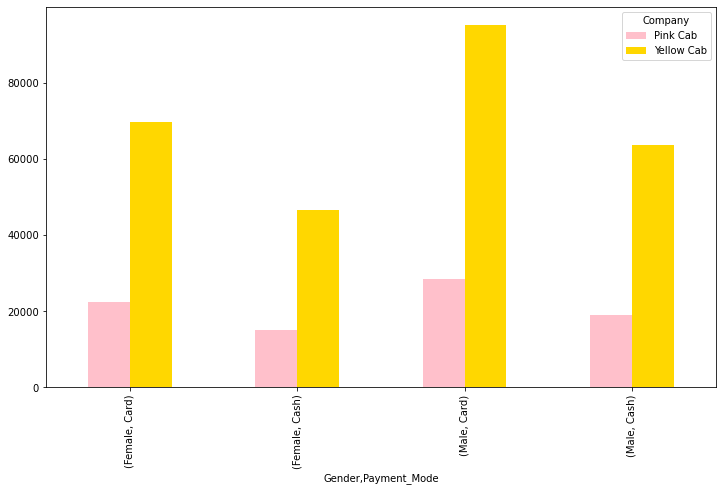

In [422]:
gender_cab = rides.groupby(by=['Company','Gender', 'Payment_Mode']).count()['Transaction ID'].unstack("Company") 
gender_cab.plot(kind="bar", figsize=(12,7),color=["pink","gold"])

We see from the bar graph different demographics on different methods of payment with different cab companies amongst male and females. 

Hypothesis 2 :  is there a preference in gender and/or method of payment when choosing which cab company to order? 
Does kilometers travlled have an influence in the method of payment or the from whuch cab company a customer is ordering from?

Text(0, 0.5, 'average price % markup ')

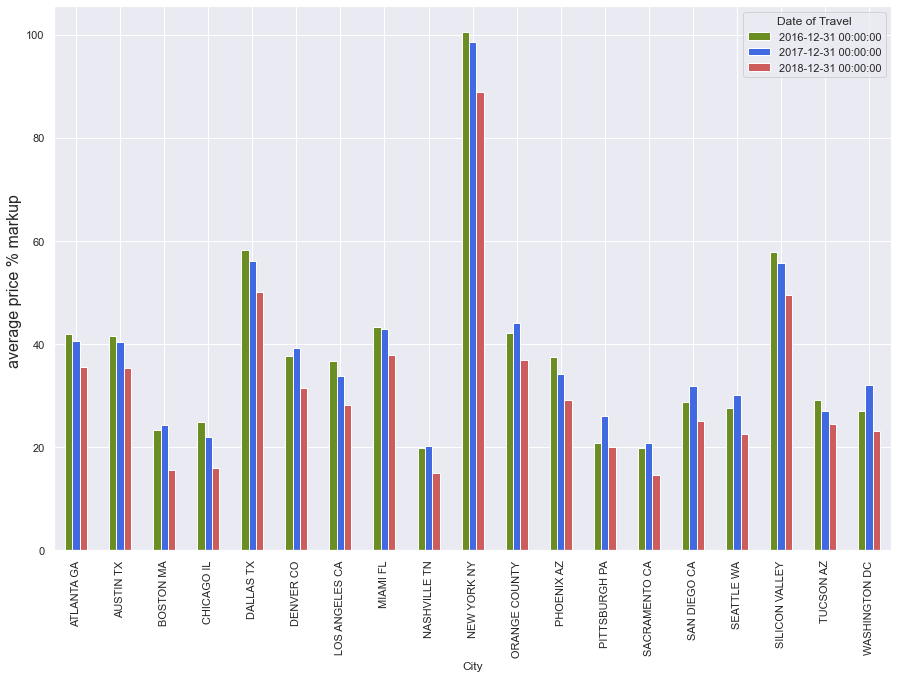

In [477]:
price_costs = ride_info[['Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'City','Income (USD/Month)', '% markup (profit)']]
bla= price_costs.groupby(by= ['City', pd.Grouper(key='Date of Travel', freq='Y')]).mean().unstack('Date of Travel')
bla.plot(kind="bar", figsize=(15,10),color=["olivedrab", 'royalblue',"indianred"], y='% markup (profit)')
plt.ylabel('average price % markup ', fontsize=16)

The bar chart illustrates the average percentage markup per cab ride per year. As seen there exsists different levels of price markups that affect price of cabs. 

Hypothesis 3: Is there a difference in profit markups per cab ride in each city? And if there is, what are the factors that determine different levels of markups in price?

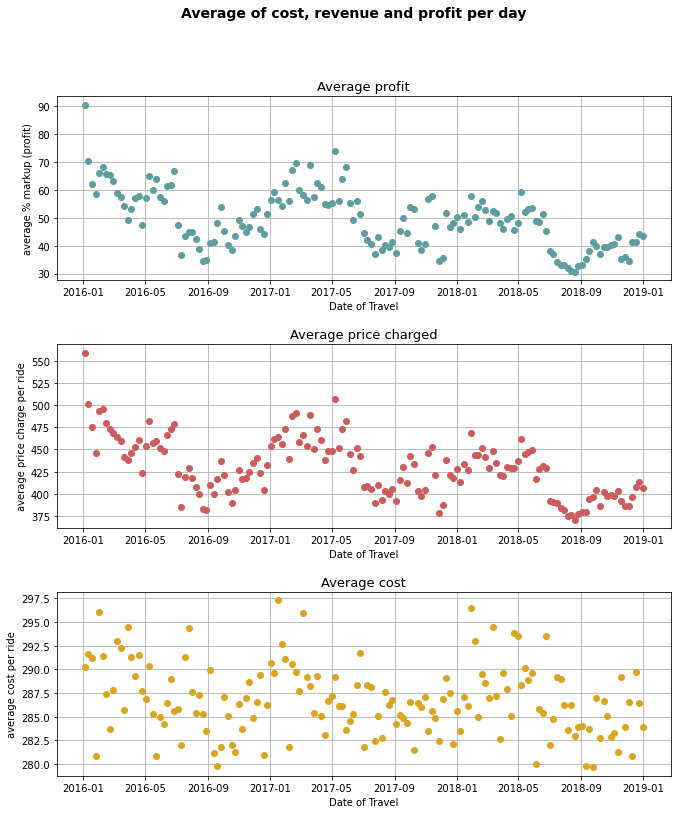

In [381]:
figure, ([ax1, ax2, ax3]) = plt.subplots(3, figsize=(11,12.5))
figure.suptitle('Average of cost, revenue and profit per day', fontsize= 14, fontweight= 'bold')

price_costs = ride_info[['Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip', '% markup (profit)']]
avg_day = price_costs.groupby(pd.Grouper(key="Date of Travel", freq="W-MON")).mean()

ax1.plot(avg_day.index, avg_day['% markup (profit)'], 'o', color= 'cadetblue', label= 'Average % markup per day')
ax1.grid()
ax1.set_xlabel('Date of Travel')
ax1.set_title('Average profit', fontsize=13)
ax1.set_ylabel('average % markup (profit)')

ax2.plot(avg_day.index, avg_day['Price Charged'], 'o', color= 'indianred', label= 'Average price charged per ride')
ax2.grid()
ax2.set_title('Average price charged', fontsize=13)
ax2.set_xlabel('Date of Travel')
ax2.set_ylabel('average price charge per ride')

ax3.plot(avg_day.index, avg_day['Cost of Trip'], 'o', color= 'goldenrod', label= 'Average price charged per ride')
ax3.grid()
ax3.set_title('Average cost', fontsize=13)
ax3.set_xlabel('Date of Travel')
ax3.set_ylabel('average cost per ride')

figure.subplots_adjust(hspace = 0.35)

Average price charge per week seems to be decreasing throughout time as average cost seems to have an relatiovly stable and ambigous chnage throughout time. Hence as seen by the graph, we see a decline in profit per cab ride throughout time. Hence we hypothesis: 

Hypothsis 4 : are the profit margins per cab ride decreasing throughout time and if so, what factor throughout time changes for the markup percentage to decrease?

Hypothesis 5 : Is the demand and price of a cab ride affected by seasonality and/or is influenced by the wheather?

Text(0, 0.5, 'Number of cab rides')

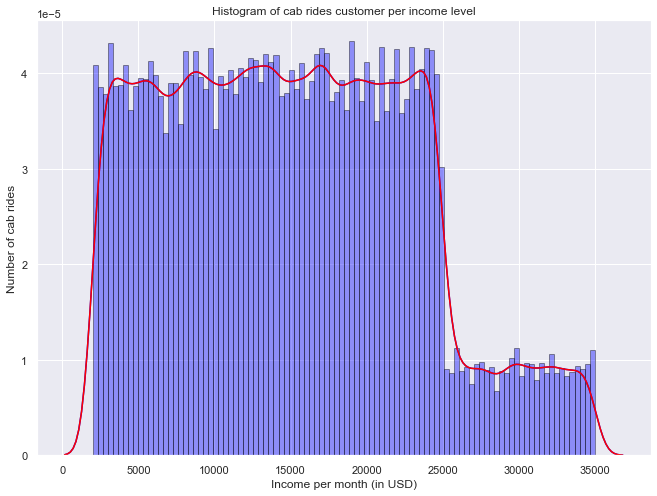

In [466]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(ride_info['Income (USD/Month)'], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(ride_info['Income (USD/Month)'], hist=False, kde=True, 
             bins=100, color = 'red',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of cab rides customer per income level')
plt.xlabel('Income per month (in USD)')
plt.ylabel('Number of cab rides')

From the histogram, we see that the demand for taxi service is relatively constant throughout all income levels until around 25000 USD per month, where we notice a significant drop in cab service demand. 

Hypothesis 6: Does the level of income influence the frequency of ordering a cab ride? How does income levels affect the price charged and distance travlled in the cab rides?

We hypothesis that income levels have an effect on cab service but not so much the level of income rather there is a threshold where the demand of cabs is not as high. 